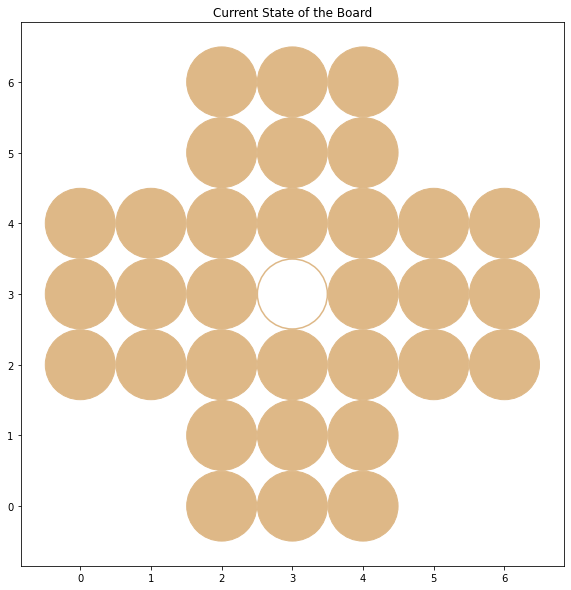

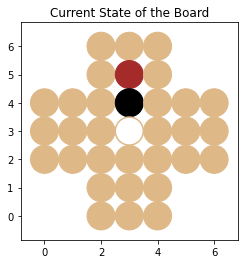

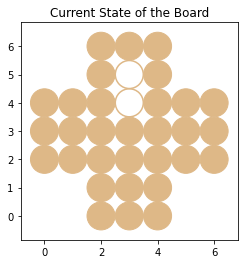

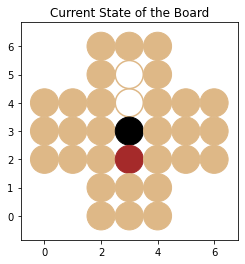

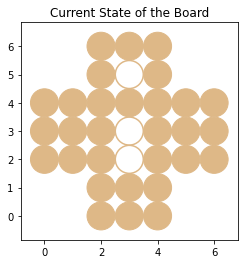

In [34]:
from env import MarbleSolitaireEnv, MarbleAction
import matplotlib.pyplot as plt

env = MarbleSolitaireEnv(init_fig=True, interactive_plot=True)
env.render()
plt.show()

# i, j, a = 3, 1, MarbleAction.RIGHT
# idx = env.i_j_to_idx(i, j)
# assert env._is_valid_action(idx, a)
# env.render(action=(idx, a), show_action=True)
# plt.show()
# env.step((idx, a))
# env.render()
# plt.show()
#
# i, j, a = 3, 4, MarbleAction.LEFT
# idx = env.i_j_to_idx(i, j)
# assert env._is_valid_action(idx, a)
# env.render(action=(idx, a), show_action=True)
# plt.show()
# env.step((idx, a))
# env.render()
# plt.show()

i, j, a = 1, 3, MarbleAction.DOWN
idx = env.i_j_to_idx(i, j)
assert env._is_valid_action(idx, a)
env.render(action=(idx, a), show_action=True)
plt.show()
env.step((idx, a))
env.render()
plt.show()

i, j, a = 4, 3, MarbleAction.UP
idx = env.i_j_to_idx(i, j)
assert env._is_valid_action(idx, a)
env.render(action=(idx, a), show_action=True)
plt.show()
env.step((idx, a))
env.render()
plt.show()

In [2]:
from stable_baselines3.common.env_checker import check_env
check_env(env)

/usr/local/Caskroom/miniconda/base/envs/marble-solitaire/lib/python3.9/site-packages/stable_baselines3/common/env_checker.py:130: UserWarning: Your observation  has an unconventional shape (neither an image, nor a 1D vector). We recommend you to flatten the observation to have only a 1D vector or use a custom policy to properly process the data.
  warnings.warn(
/usr/local/Caskroom/miniconda/base/envs/marble-solitaire/lib/python3.9/site-packages/stable_baselines3/common/env_checker.py:272: UserWarning: We recommend you to use a symmetric and normalized Box action space (range=[-1, 1]) cf https://stable-baselines3.readthedocs.io/en/master/guide/rl_tips.html
  warnings.warn(


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


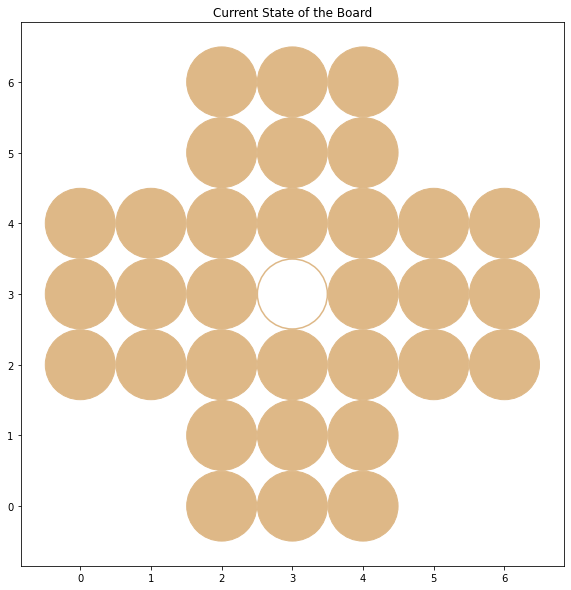

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
----------------------------------
| rollout/           |           |
|    ep_len_mean     | 737       |
|    ep_rew_mean     | -3.57e+05 |
| time/              |           |
|    fps             | 880       |
|    iterations      | 1         |
|    time_elapsed    | 2         |
|    total_timesteps | 2048      |
----------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 779          |
|    ep_rew_mean          | -4.04e+05    |
| time/                   |              |
|    fps                  | 687          |
|    iterations           | 2            |
|    time_elapsed         | 5            |
|    total_timesteps      | 4096         |
| train/                  |              |
|    approx_kl            | 3.577792e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2         

In [18]:
%load_ext autoreload
%autoreload 2

import os

os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

from env import MarbleSolitaireEnv, MarbleAction
import matplotlib.pyplot as plt

env = MarbleSolitaireEnv(init_fig=True, interactive_plot=True)
env.render()
plt.show()

from stable_baselines3.common.policies import ActorCriticPolicy
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3 import PPO

model = PPO(ActorCriticPolicy, env, verbose=1)
model.learn(total_timesteps=50000)

i,j: (3, 5), a:LEFT


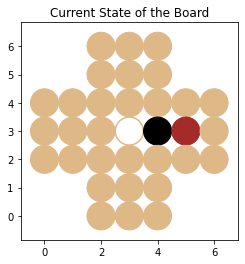

i,j: (1, 4), a:DOWN


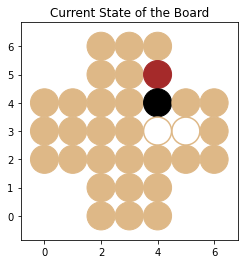

i,j: (3, 3), a:RIGHT


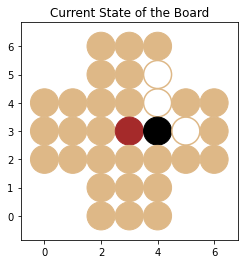

i,j: (5, 3), a:UP


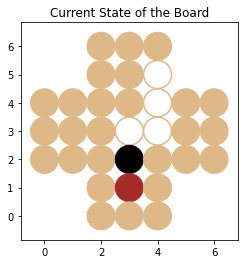

i,j: (1, 2), a:RIGHT


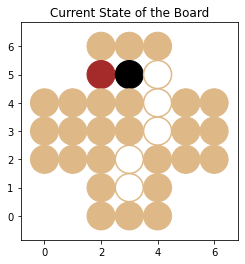

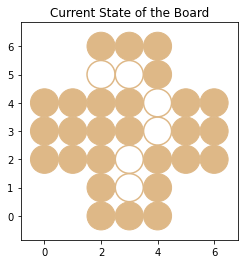

In [36]:
obs = env.reset()
for i in range(100):
    action, _states = model.predict(obs)
    # print(f'i:{action[0]}, j:{action[1]}, a:{MarbleAction(action[2]).name}')
    if env._is_valid_action(*action):
        print(f'i,j: {env.idx_to_i_j(action[0])}, a:{MarbleAction(action[1]).name}')
        env.render(action=action, show_action=True)
        plt.show()
    obs, rewards, dones, info = env.step(action)
    # if env._is_valid_action(*action):
    #     env.render()
    #     plt.show()

env.render()
plt.show()